<a href="https://colab.research.google.com/github/JuliaInoscencia/ESP1A5-Projeto/blob/main/ProjetoESP1A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e configurações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, norm, pearsonr, chi2_contingency
import numpy as np


## Importações

In [ ]:
!pip install --upgrade gdown

### Importação de pasta e arquivos

In [ ]:
#Pasta Projeto Estátistica
!gdown --folder --id 1RLwDgm4-gHDz9ai-LBzCIOI_GxaWyB7x

#CSV Total de mortes por milhão
!gdown --id 1HkopaTfpv2w9tDmqIFHpDSV8gkmELwYH -O total_deaths_per_million.csv

#CSV hospitalizações
!gdown --id 1hZJOt-qT2uUeNUVvNJzXPHcPpjDxBObQ -O covid-hospitalizations.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1hZJOt-qT2uUeNUVvNJzXPHcPpjDxBObQ covid-hospitalizations.csv
Processing file 11JSG_JspdJYJt4hh1OVgVVS4g95rrL2y ProjetoESP1A5.ipynb
Processing file 1tuek9c9Bktwppun_5yS30LnFXpAMRco-5lU1UNrPYh0 Relatório do Projeto
Processing file 1HkopaTfpv2w9tDmqIFHpDSV8gkmELwYH total_deaths_per_million.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hZJOt-qT2uUeNUVvNJzXPHcPpjDxBObQ
To: /content/Projeto Estatística/covid-hospitalizations.csv
100% 14.2M/14.2M [00:00<00:00, 28.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=11JSG_JspdJYJt4hh1OVgVVS4g95rrL2y
To: /content/Projeto Estatística/ProjetoESP1A5.ipynb
100% 913k/913

## **Criando Dataframes**

In [ ]:
# Carregar os dados
df_mortes = pd.read_csv("total_deaths_per_million.csv")
df_hospitalizacoes = pd.read_csv("covid-hospitalizations.csv")

# Verificar colunas reais
print("=== Colunas em df_mortes ===")
print(df_mortes.columns.tolist())

print("\n=== Colunas em df_hospitalizacoes ===")
print(df_hospitalizacoes.columns.tolist())

=== Colunas em df_mortes ===
['date', 'World', 'Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European

#Traduções

In [ ]:
# Tradução dos países
traducao_paises = {
    'Peru': 'Peru',
    'North Macedonia': 'Macedônia do Norte',
    'Bulgaria': 'Bulgária',
    'Bosnia and Herzegovina': 'Bósnia e Herzegovina',
    'Brazil': 'Brasil',
    'World': 'Mundo',
    'Hungary': 'Hungria',
    'Montenegro': 'Montenegro',
    'Croatia': 'Croácia',
    'Slovenia': 'Eslovênia',
    'Georgia': 'Geórgia',
    'Czech Republic': 'República Tcheca',
    'Argentina': 'Argentina',
    'Colombia': 'Colômbia',
    'Mexico': 'México',
    'Chile': 'Chile',
    'United States': 'Estados Unidos',
    'Italy': 'Itália',
    'Spain': 'Espanha',
    'France': 'França',
    'Germany': 'Alemanha',
    'United Kingdom': 'Reino Unido',
    'Portugal': 'Portugal',
    'Poland': 'Polônia',
    'Russia': 'Rússia',
    'China': 'China',
    'Japan': 'Japão',
    'South Korea': 'Coreia do Sul',
    'India': 'Índia',
    'Canada': 'Canadá',
    'Australia': 'Austrália',
    'New Zealand': 'Nova Zelândia',
    'South Africa': 'África do Sul',
    'Turkey': 'Turquia',
    'Greece': 'Grécia',
    'Netherlands': 'Países Baixos',
    'Belgium': 'Bélgica',
    'Switzerland': 'Suíça',
    'Sweden': 'Suécia',
    'Norway': 'Noruega',
    'Denmark': 'Dinamarca',
    'Finland': 'Finlândia',
    'Austria': 'Áustria',
    'Ireland': 'Irlanda',
    "Northern Ireland": "Irlanda do Norte"
}

# Tradução dos continentes
traducao_continentes = {
    "Africa": "África",
    "Asia": "Ásia",
    "Europe": "Europa",
    "North America": "América do Norte",
    "South America": "América do Sul",
    "Oceania": "Oceania"
}

traducao_metricas = {
    'mean': 'Média',
    'median': 'Mediana',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    'max': 'Máximo',
    'count': 'Contagem'
}


# Estatística Descritiva

### Países com mais morte por milhão

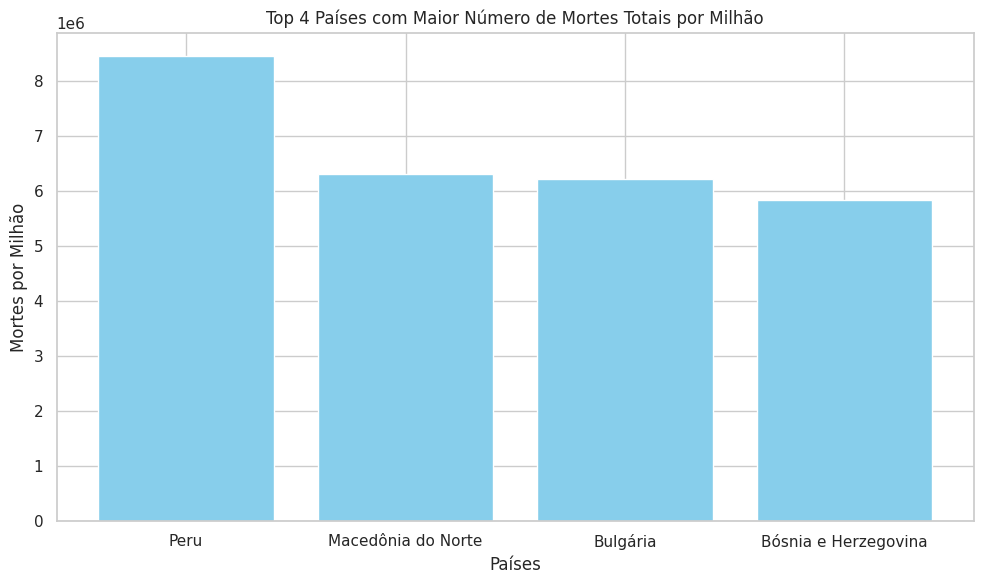

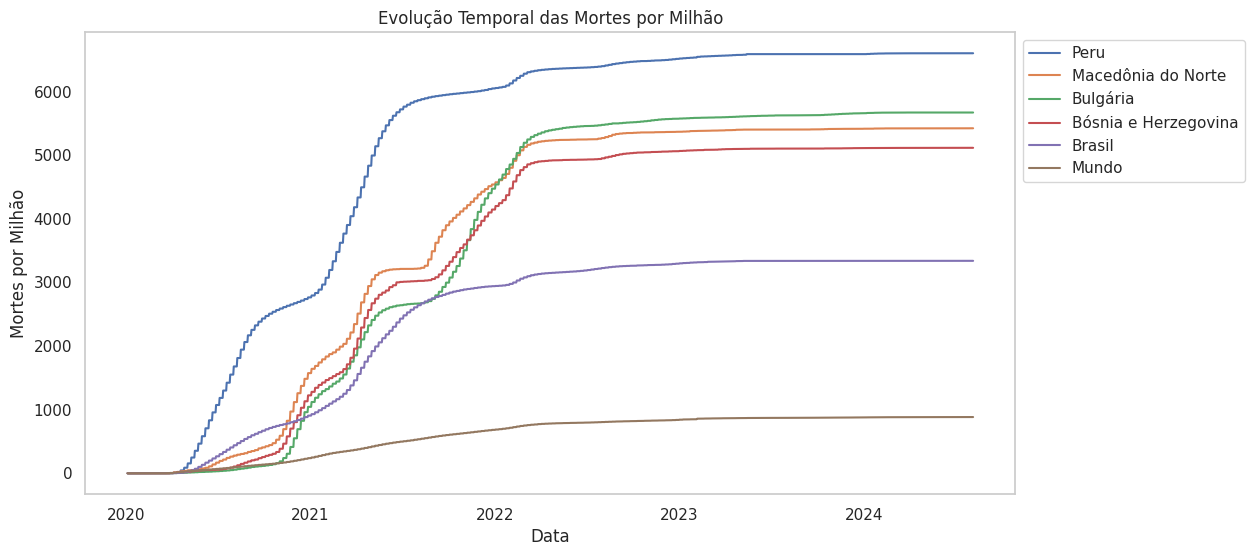

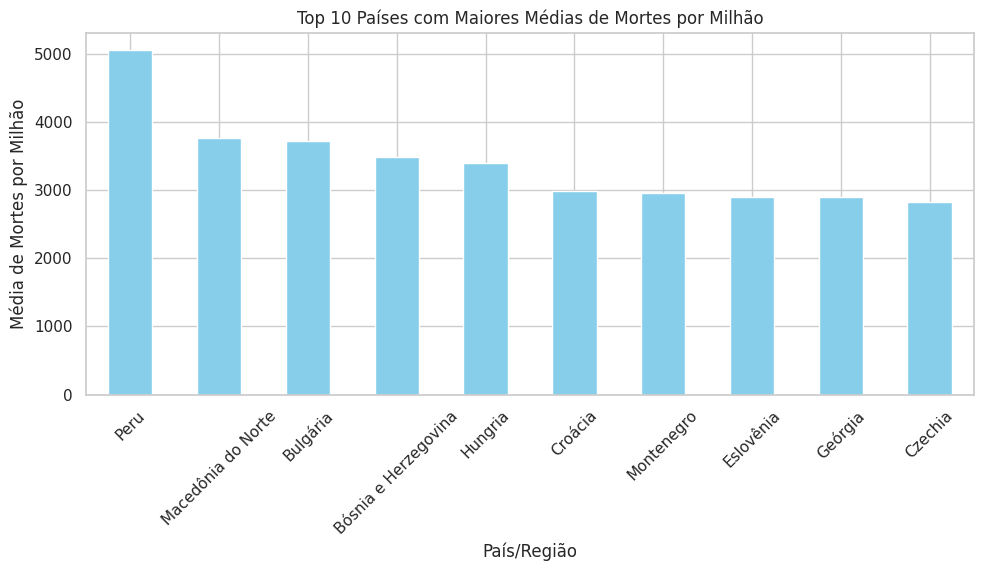

In [ ]:
# Análise 1: Top 4 países com maior número total de mortes por milhão
mortes_totais = df_mortes.drop(columns=['date']).sum()
top_4_paises = mortes_totais.nlargest(4)

top_4_paises_traduzidos = [traducao_paises.get(pais, pais) for pais in top_4_paises.index]

plt.figure(figsize=(10, 6))
plt.bar(top_4_paises_traduzidos, top_4_paises.values, color='skyblue')
plt.title("Top 4 Países com Maior Número de Mortes Totais por Milhão")
plt.xlabel("Países")
plt.ylabel("Mortes por Milhão")
plt.tight_layout()
plt.show()

print("\n")

# Análise 2: Evolução temporal
if 'date' in df_mortes.columns:
    df_mortes['date'] = pd.to_datetime(df_mortes['date'])
    paises_selecionados = ['Peru', 'North Macedonia', 'Bulgaria', 'Bosnia and Herzegovina', 'Brazil', 'World']

    plt.figure(figsize=(12, 6))
    for pais in paises_selecionados:
        if pais in df_mortes.columns:
            plt.plot(df_mortes['date'], df_mortes[pais], label=traducao_paises.get(pais, pais))
    plt.title('Evolução Temporal das Mortes por Milhão')
    plt.xlabel('Data')
    plt.ylabel('Mortes por Milhão')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()
else:
    print("AVISO: Coluna 'date' não encontrada.")

print("\n")

# Análise 3: Médias
# Calcular a média das mortes por país
medias_mortes = df_mortes.drop(columns=['date']).mean().sort_values(ascending=False)

medias_mortes_traduzidas = [traducao_paises.get(pais, pais) for pais in medias_mortes.index]

plt.figure(figsize=(10, 6))
medias_mortes.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Países com Maiores Médias de Mortes por Milhão')
plt.xlabel('País/Região')
plt.ylabel('Média de Mortes por Milhão')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(ticks=range(10), labels=medias_mortes_traduzidas[:10])
plt.show()


### Contagem absoluta de mortes por continente

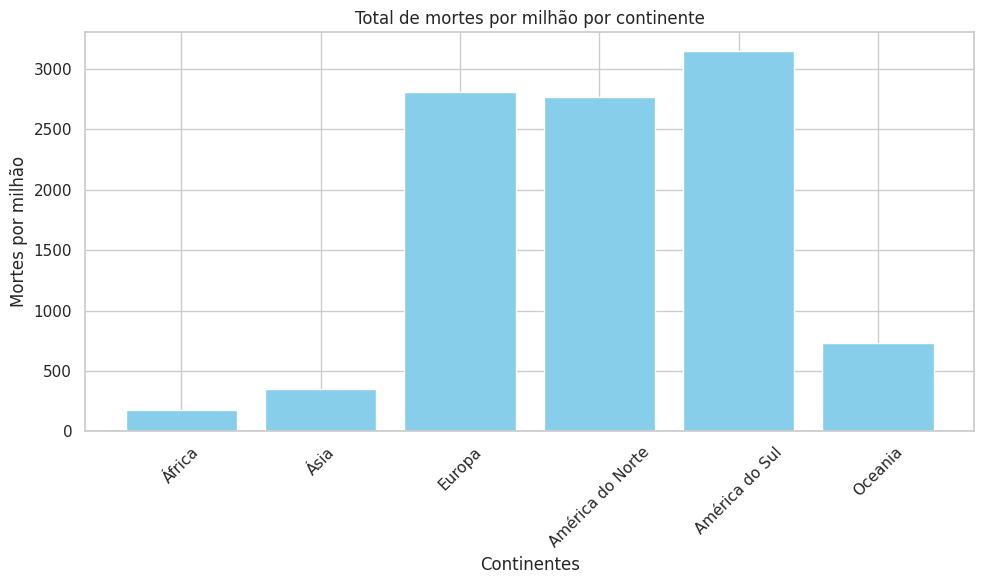

In [ ]:
#4. Análise mortes totais por continente
continents = ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]


df_latest = df_mortes.iloc[-1]
continent_deaths = df_latest[continents]

continent_deaths.index = continent_deaths.index.map(traducao_continentes)

plt.figure(figsize=(10, 6))
plt.bar(continent_deaths.index, continent_deaths.values, color='skyblue')
plt.xlabel("Continentes")
plt.ylabel("Mortes por milhão")
plt.title("Total de mortes por milhão por continente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Análise temporal de mortes por continente

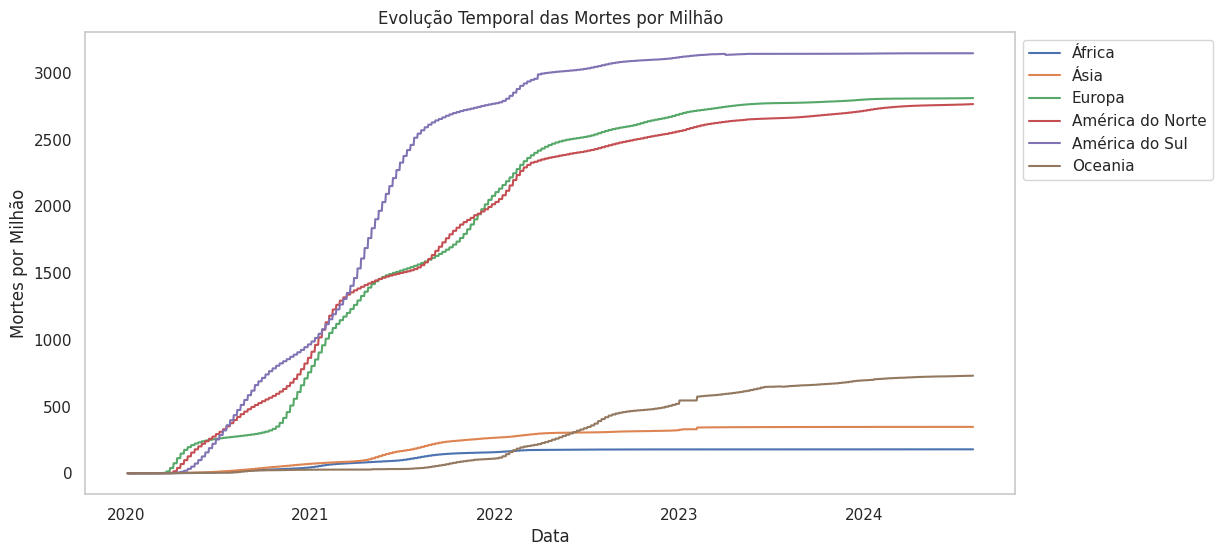

In [ ]:
# 5. Análise Temporal
if 'date' in df_mortes.columns:
    df_mortes['date'] = pd.to_datetime(df_mortes['date'])
    df_mortes_por_data = df_mortes.groupby('date')[continents].sum()

    plt.figure(figsize=(12, 6))
    for cont in continents:
        continente_traduzido = traducao_continentes.get(cont, cont)
        plt.plot(df_mortes_por_data.index, df_mortes_por_data[cont], label=continente_traduzido)

    plt.title('Evolução Temporal das Mortes por Milhão')
    plt.xlabel('Data')
    plt.ylabel('Mortes por Milhão')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()
else:
    print("\nAVISO: Análise temporal não realizada - coluna 'date' não encontrada.")


### Mortes por continente (média + evolução temporal)

Continente,Média de Mortes por Milhão
África,126.781959
América do Norte,1858.901126
América do Sul,2285.347781
Ásia,226.849660
Europa,1884.892241
Oceania,317.368711


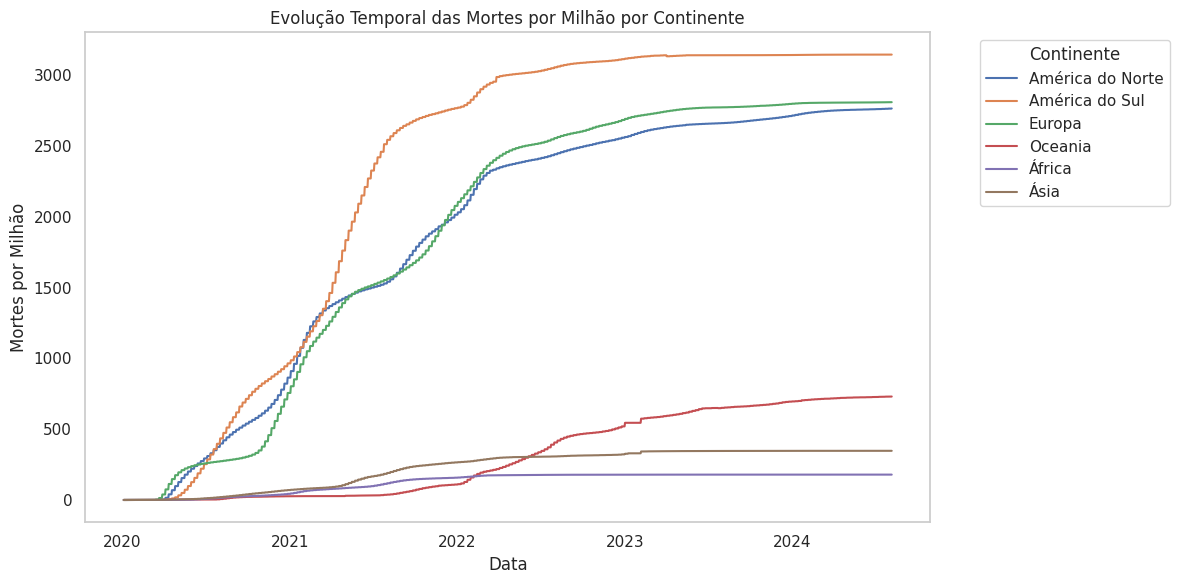

In [ ]:
media_mortes_por_continente = df_mortes[list(traducao_continentes.keys())].mean()

df_media_mortes = pd.DataFrame({
    "Continente": [traducao_continentes[continente] for continente in list(traducao_continentes.keys())],
    "Média de Mortes por Milhão": media_mortes_por_continente.values
})

df_media_mortes = df_media_mortes.sort_values(by="Continente", key=lambda col: col.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

display(df_media_mortes.style.hide(axis="index"))
print('\n')

if 'date' in df_mortes.columns:
    df_mortes['date'] = pd.to_datetime(df_mortes['date'])

    df_mortes_por_data = df_mortes.groupby('date')[list(traducao_continentes.keys())].sum()

    continentes_ordenados = sorted(traducao_continentes.keys(), key=lambda x: traducao_continentes[x])

    plt.figure(figsize=(12, 6))
    for continente_en in sorted(continentes_ordenados, key=lambda x: traducao_continentes[x]):
        plt.plot(df_mortes_por_data.index, df_mortes_por_data[continente_en],
                 label=traducao_continentes[continente_en])
    plt.title('Evolução Temporal das Mortes por Milhão por Continente')
    plt.xlabel('Data')
    plt.ylabel('Mortes por Milhão')
    plt.legend(title="Continente", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("AVISO: Coluna 'date' não encontrada para análise temporal.")

### Boxplot das mortes por continente

Limiar é a média das médias de mortes por continente

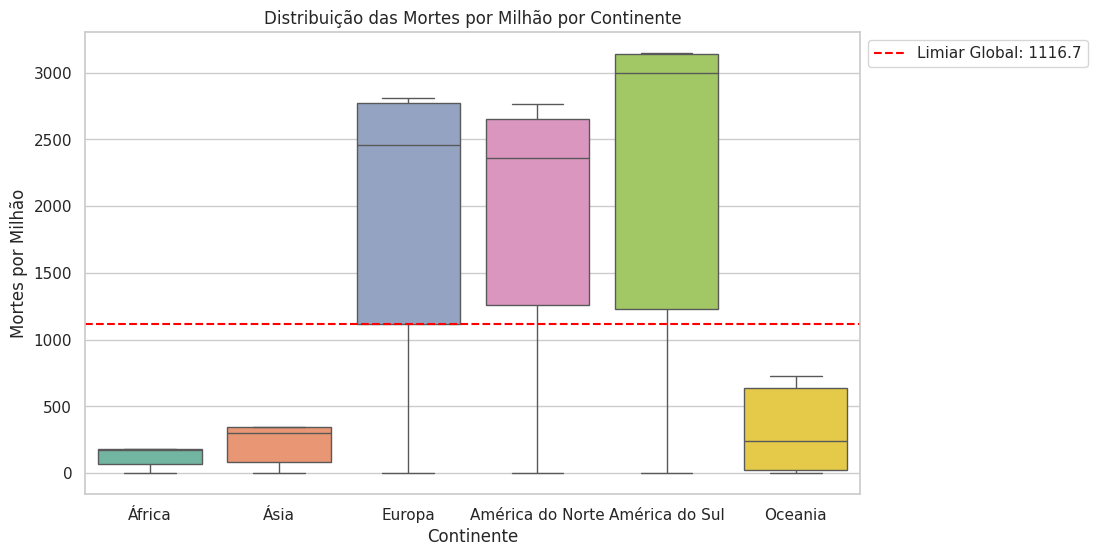

In [ ]:
limiar_global = df_mortes[list(traducao_continentes.keys())].mean().mean()

#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mortes[list(traducao_continentes.keys())], palette="Set2")
plt.xticks(ticks=range(len(traducao_continentes)), labels=[traducao_continentes[col] for col in traducao_continentes.keys()])
plt.title('Distribuição das Mortes por Milhão por Continente')
plt.xlabel('Continente')
plt.ylabel('Mortes por Milhão')
plt.axhline(limiar_global, color='red', linestyle='--', label=f'Limiar Global: {limiar_global:.1f}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Distribuição de continente pela limiar

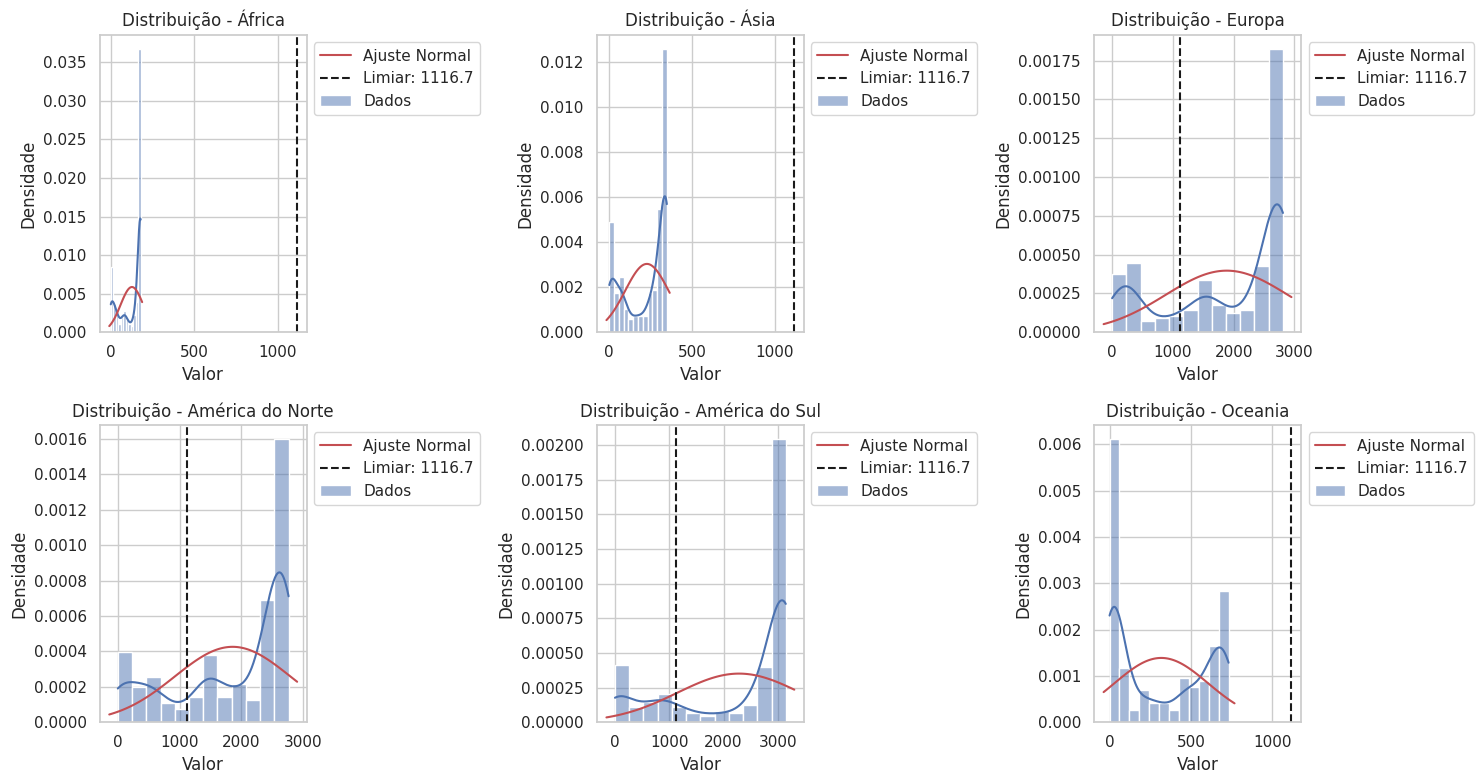

Arquivo CSV com as probabilidades gerado com sucesso.


In [ ]:
continentes = list(traducao_continentes.keys())

descricao_estatistica = df_mortes[continentes].describe().T
descricao_estatistica['Coeficiente de Variação'] = descricao_estatistica['std'] / descricao_estatistica['mean']

# 2. Cálculo de Probabilidades
# Limiar global (média das médias)
limiar_medio = df_mortes[continentes].mean().mean()

# Abordagem empírica
probabilidade_empirica = df_mortes[continentes].apply(lambda x: (x > limiar_medio).mean())

# Abordagem paramétrica (normal)
probabilidade_parametrica = []
for continente in continentes:
    media = descricao_estatistica.loc[continente, 'mean']
    desvio_padrao = descricao_estatistica.loc[continente, 'std']
    probabilidade = 1 - norm.cdf(limiar_medio, loc=media, scale=desvio_padrao)
    probabilidade_parametrica.append(probabilidade)

df_probabilidade = pd.DataFrame({
    'Continente': continentes,
    'Probabilidade Empírica': probabilidade_empirica,
    'Probabilidade (Normal)': probabilidade_parametrica,
    'Média do Continente': descricao_estatistica['mean']
})

df_probabilidade['Continente'] = df_probabilidade['Continente'].map(traducao_continentes)

# 3. Análise de Risco Relativo
df_probabilidade['Probabilidade Empírica'] = df_probabilidade['Probabilidade Empírica'].fillna(0)
df_probabilidade['Risco Relativo'] = df_probabilidade['Probabilidade Empírica'] / (df_probabilidade['Probabilidade Empírica'].min() + 1e-10)

# 4. Visualização de Dados
plt.figure(figsize=(15, 8))
for i, continente in enumerate(continentes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_mortes[continente], kde=True, stat='density', label='Dados')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, descricao_estatistica.loc[continente, 'mean'], descricao_estatistica.loc[continente, 'std'])
    plt.plot(x, p, 'r', label='Ajuste Normal')
    plt.axvline(limiar_medio, color='k', linestyle='--', label=f'Limiar: {limiar_medio:.1f}')

    titulo_continente = traducao_continentes[continente]
    plt.title(f'Distribuição - {titulo_continente}')
    plt.xlabel("Valor")
    plt.ylabel("Densidade")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# 5. Salvando Resultados
df_probabilidade.to_csv('probabilidades_continentes.csv', index=False)

# Estatística probabilística

In [ ]:
# 4. Análise de Risco Relativo
df_probabilidade['Risco Relativo'] = df_probabilidade['Probabilidade Empírica'] / df_probabilidade['Probabilidade Empírica'].min()

descricao_estatistica = descricao_estatistica.rename(index=traducao_continentes)

descricao_estatistica = descricao_estatistica.rename(columns={
    'mean': 'Média',
    'std': 'Desvio Padrão',
    '50%': 'Mediana',
    'Coeficiente de Variação': 'Coeficiente de Variação'
})


print("\nEstatísticas Descritivas:")
display(descricao_estatistica[['Média', 'Desvio Padrão', 'Mediana', 'Coeficiente de Variação']])

df_probabilidade['Risco Relativo'] = df_probabilidade['Probabilidade Empírica'] / df_probabilidade['Probabilidade Empírica'].min()

df_probabilidade = df_probabilidade.rename(index=traducao_continentes)

df_probabilidade = df_probabilidade.loc[:, ~df_probabilidade.columns.str.contains('Unnamed')]

df_probabilidade = df_probabilidade.sort_values('Continente')

print("\nProbabilidades e Risco:")
display(df_probabilidade[['Probabilidade Empírica', 'Probabilidade (Normal)', 'Média do Continente', 'Risco Relativo']])



Estatísticas Descritivas:


,Média,Desvio Padrão,Mediana,Coeficiente de Variação
África,126.781959,68.009848,175.219,0.536432
Ásia,226.849660,131.329613,300.769,0.578928
Europa,1884.892241,1005.747602,2457.702,0.533584
América do Norte,1858.901126,936.567635,2363.070,0.503829
América do Sul,2285.347781,1136.425950,3000.921,0.497266
Oceania,317.368711,287.475068,242.155,0.905808



Probabilidades e Risco:


,Probabilidade Empírica,Probabilidade (Normal),Média do Continente,Risco Relativo
América do Norte,0.765830,7.859595e-01,1858.901126,inf
América do Sul,0.761649,8.481103e-01,2285.347781,inf
Europa,0.753286,7.775103e-01,1884.892241,inf
Oceania,0.000000,2.713847e-03,317.368711,NaN
África,0.000000,0.000000e+00,126.781959,NaN
Ásia,0.000000,6.193379e-12,226.849660,NaN


# Inferência

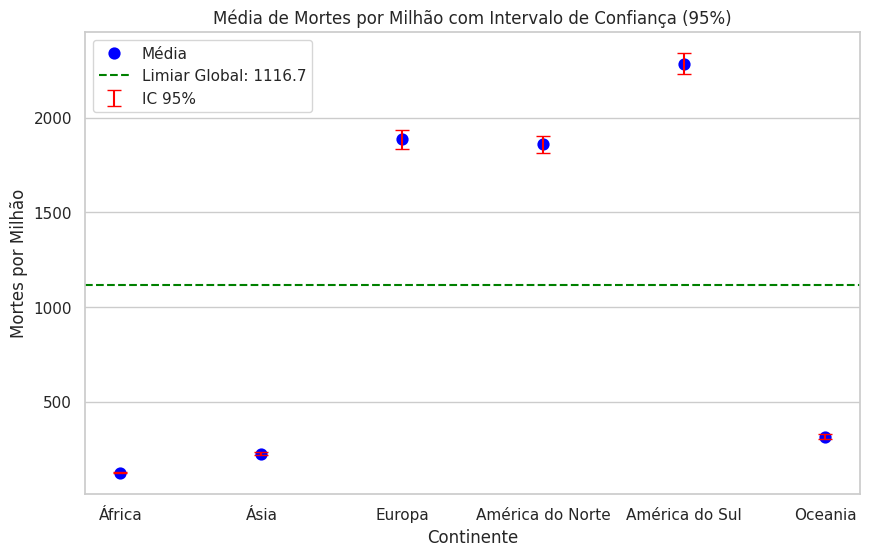


Resultados da Inferência Estatística:


,Continente,Média,Limiar Global,Estatística t,Valor p,IC Inferior (95%),IC Superior (95%)
0,África,126.781959,1116.690246,-595.526210,0.000000e+00,123.521667,130.042251
1,Ásia,226.849660,1116.690246,-277.221733,0.000000e+00,220.553912,233.145408
2,Europa,1884.892241,1116.690246,31.251017,2.929963e-169,1836.678184,1933.106298
3,América do Norte,1858.901126,1116.690246,32.423948,2.282587e-179,1814.003454,1903.798798
4,América do Sul,2285.347781,1116.690246,42.074973,1.617606e-264,2230.869197,2339.826366
5,Oceania,317.368711,1116.690246,-113.762481,0.000000e+00,303.587580,331.149842


In [ ]:
continentes = ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]

continentes_traduzidos = [traducao_continentes[cont] for cont in continentes]

# 1. Análise Descritiva
descricao = df_mortes[continentes].describe().T
descricao['Coeficiente de Variação'] = descricao['std'] / descricao['mean']
descricao.index = continentes_traduzidos  # Ajusta os nomes para os traduzidos

# 2. Inferência Estatística
# Hipótese nula (H0): A média de mortes por milhão é igual ao limiar global.
# Hipótese alternativa (H1): A média de mortes por milhão é diferente do limiar global.
limiar_global = df_mortes[continentes].mean().mean()

# Função para calcular intervalo de confiança da média
def intervalo_confianca(data, confianca=0.95):
    media = np.mean(data)
    std = np.std(data, ddof=1)  # Desvio padrão amostral
    n = len(data)
    erro_padrao = std / np.sqrt(n)
    margem_erro = erro_padrao * t.ppf((1 + confianca) / 2, df=n-1)
    return (media - margem_erro, media + margem_erro)

# Teste de hipótese e intervalo de confiança para cada continente
resultados_inferencia = []
for cont, cont_trad in zip(continentes, continentes_traduzidos):
    dados = df_mortes[cont].dropna()  # Remove valores faltantes
    # Teste t de uma amostra
    t_stat, p_valor = ttest_1samp(dados, limiar_global)
    # Intervalo de confiança
    ic_inferior, ic_superior = intervalo_confianca(dados)
    resultados_inferencia.append({
        'Continente': cont_trad,
        'Média': np.mean(dados),
        'Limiar Global': limiar_global,
        'Estatística t': t_stat,
        'Valor p': p_valor,
        'IC Inferior (95%)': ic_inferior,
        'IC Superior (95%)': ic_superior
    })

# DataFrame de resultados inferenciais
df_inferencia = pd.DataFrame(resultados_inferencia)

# 3. Visualização dos Intervalos de Confiança
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_inferencia, x='Continente', y='Média', linestyle='none', color='blue', label='Média')
plt.errorbar(
    x=range(len(df_inferencia)),
    y=df_inferencia['Média'],
    yerr=[df_inferencia['Média'] - df_inferencia['IC Inferior (95%)'], df_inferencia['IC Superior (95%)'] - df_inferencia['Média']],
    fmt='none', color='red', capsize=5, label='IC 95%'
)
plt.axhline(limiar_global, color='green', linestyle='--', label=f'Limiar Global: {limiar_global:.1f}')
plt.title('Média de Mortes por Milhão com Intervalo de Confiança (95%)')
plt.xlabel('Continente')
plt.ylabel('Mortes por Milhão')
plt.legend()
plt.show()

# 4. Exibir resultados inferenciais
print("\nResultados da Inferência Estatística:")
display(df_inferencia)


#Hospitalizações

## Análise Descritiva


Análise de UTI:


,UTI
Contagem,39116.000000
Média,660.971418
Desvio Padrão,2139.615532
Mínimo,0.000000
25%,21.000000
50%,90.000000
75%,413.000000
Máximo,28891.000000



Top 5 países - UTI:


,País,Média,Máximo
40,Estados Unidos,7703.35,28891.0
1,Argentina,2934.58,7969.0
15,França,2046.52,7019.0
16,Alemanha,1771.24,5761.0
36,Espanha,1060.60,4894.0



5 países com menores valores - UTI:


,País,Média,Máximo
25,Malta,2.74,27.0
23,Luxembourg,9.81,50.0
13,Estonia,14.47,70.0
9,Cyprus,15.18,57.0
27,Irlanda do Norte,16.77,63.0


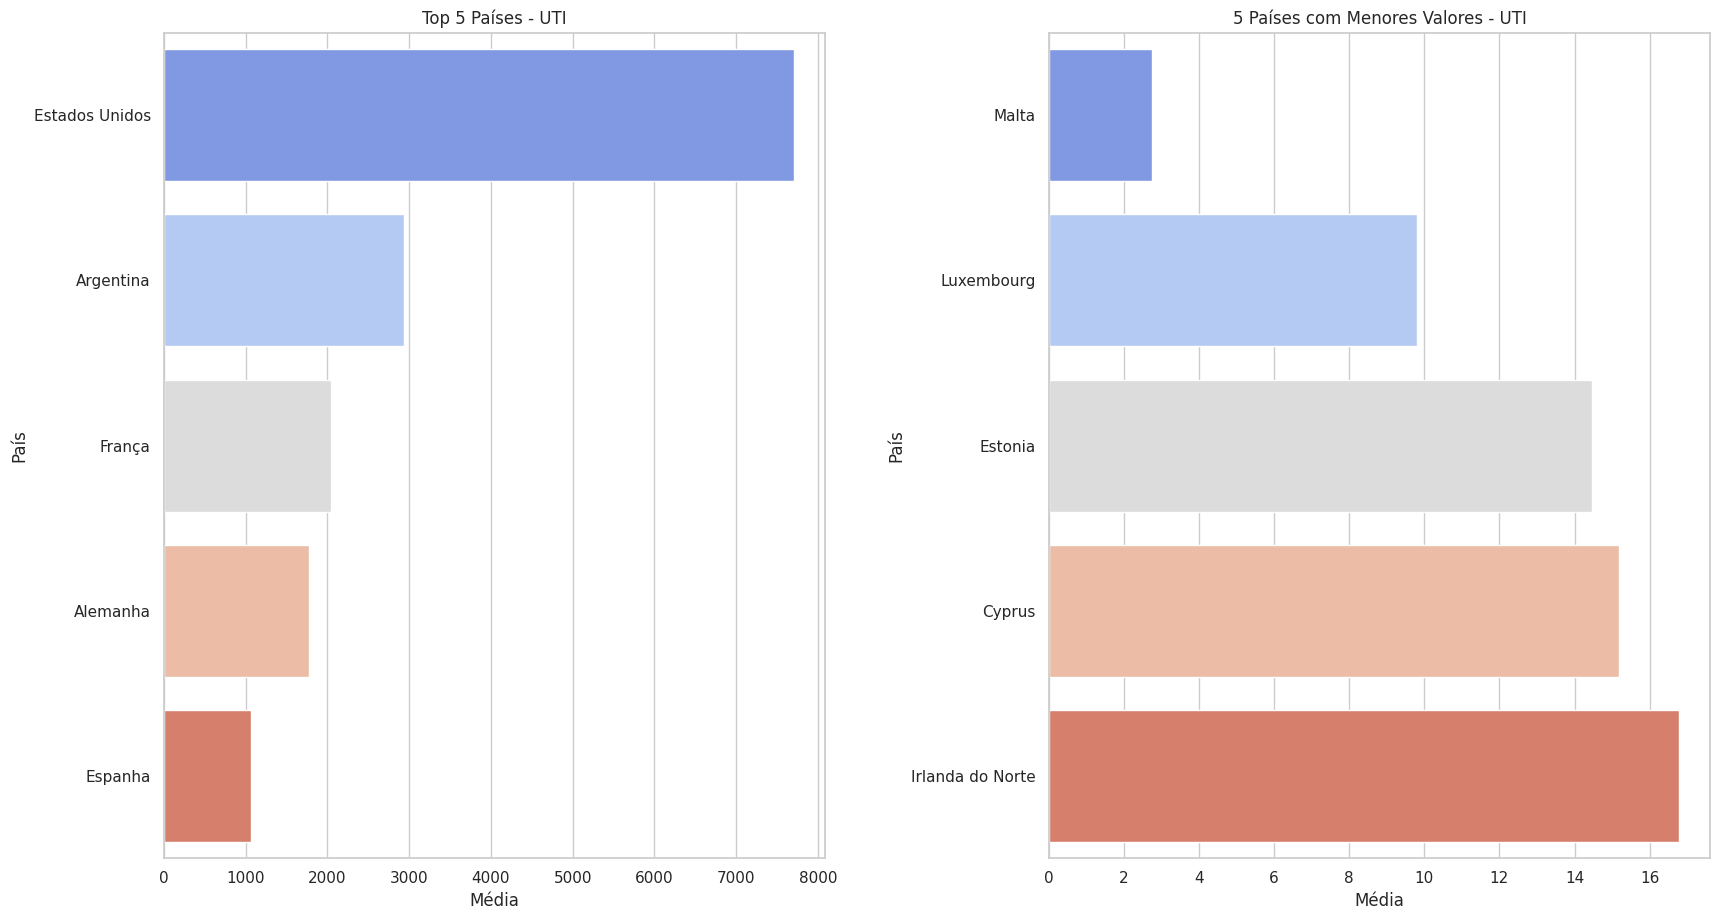


Análise de UTI por Milhão:


,UTI por Milhão
Contagem,39116.000000
Média,15.656340
Desvio Padrão,22.785489
Mínimo,0.000000
25%,2.328000
50%,6.434000
75%,18.779250
Máximo,180.675000



Top 5 países - UTI por Milhão:


,País,Média,Máximo
1,Argentina,64.48,175.10
8,Chile,40.59,173.74
33,Eslovênia,30.89,136.33
15,França,30.18,103.50
6,Bulgária,29.16,117.81



5 países com menores valores - UTI por Milhão:


,País,Média,Máximo
0,Algeria,0.45,1.49
2,Austrália,2.76,16.20
17,Irlanda,3.59,18.32
14,Finlândia,4.67,14.98
11,Dinamarca,4.77,26.01


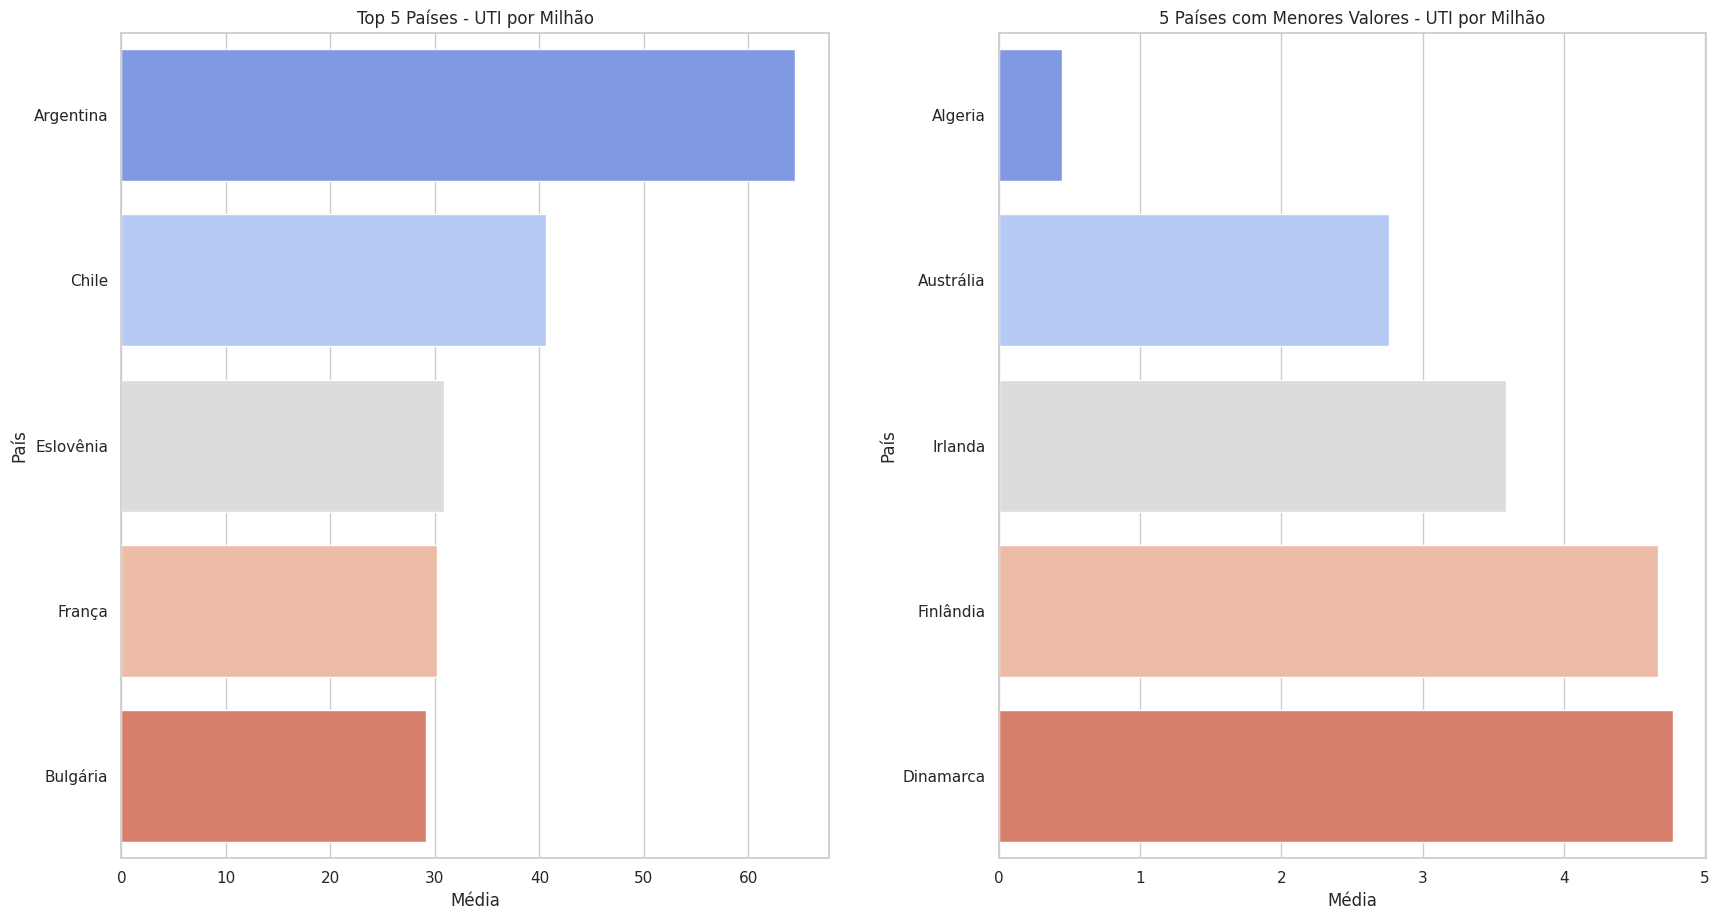

In [ ]:
# 1. Análise Descritiva
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Função para plotar a evolução das hospitalizações
def plotar_evolucao_hospitalizacoes(df, col_pais, col_hospitalizacoes):
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df,
        x='year',
        y=col_hospitalizacoes,
        hue=col_pais,
        estimator='mean',
        errorbar=None
    )
    plt.title('Evolução das Hospitalizações ao Longo dos Anos (Top 5 Países)')
    plt.xlabel('Ano')
    plt.ylabel('Número Médio de Hospitalizações')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=3)
    plt.show()

# Função para analisar dados de UTI
def analisar_uti(df, indicador, titulo, traducao_paises=None):
    stats = df.groupby(['entity', 'indicator'])['value'].agg(
        ['mean', 'median', 'std', 'min', 'max', 'count']
    ).reset_index().round(2)

    if traducao_paises:
        stats['entity'] = stats['entity'].map(traducao_paises).fillna(stats['entity'])

    stats.rename(columns=traducao_metricas, inplace=True)

    df_filtrado = stats[stats['indicator'] == indicador]

    top_5 = df_filtrado.nlargest(5, 'Média')
    bottom_5 = df_filtrado.nsmallest(5, 'Média')

    return top_5, bottom_5

# Supondo que df_hospitalizacoes contém todos os dados
# Filtre os dados para criar df_icu e df_icu_per_million
df_icu = df_hospitalizacoes[df_hospitalizacoes['indicator'] == 'Daily ICU occupancy']
df_icu_per_million = df_hospitalizacoes[df_hospitalizacoes['indicator'] == 'Daily ICU occupancy per million']

# Verifique se os DataFrames foram criados corretamente
if df_icu.empty or df_icu_per_million.empty:
    raise ValueError("Um dos DataFrames está vazio. Verifique os filtros aplicados.")

# Loop para análise de diferentes datasets
for dataset, indicador, titulo in [
    (df_icu, 'Daily ICU occupancy', 'UTI'),
    (df_icu_per_million, 'Daily ICU occupancy per million', 'UTI por Milhão')
]:
    print(f"\nAnálise de {titulo}:")
    display(dataset['value'].describe().rename(index=traducao_metricas).to_frame(titulo))

    top, bottom = analisar_uti(dataset, indicador, titulo, traducao_paises)

    print(f"\nTop 5 países - {titulo}:")
    display(top.rename(columns={'entity': 'País'})[['País', 'Média', 'Máximo']])

    print(f"\n5 países com menores valores - {titulo}:")
    display(bottom.rename(columns={'entity': 'País'})[['País', 'Média', 'Máximo']])

    fig, ax = plt.subplots(1, 2, figsize=(18, 10))

    sns.barplot(x='Média', y='entity', data=top, hue='entity', palette='coolwarm', ax=ax[0], legend=False)
    ax[0].set_title(f'Top 5 Países - {titulo}')
    ax[0].set_ylabel('País')

    sns.barplot(x='Média', y='entity', data=bottom, hue='entity', palette='coolwarm', ax=ax[1], legend=False)
    ax[1].set_title(f'5 Países com Menores Valores - {titulo}')
    ax[1].set_ylabel('País')

    plt.tight_layout(pad=3)
    plt.subplots_adjust(hspace=1.5)
    plt.show()

## Estatística Probabilística

Correlação entre hospitalizações e mortes por milhão: -0.51
Teste qui-quadrado de independência: valor_p = 0.00648


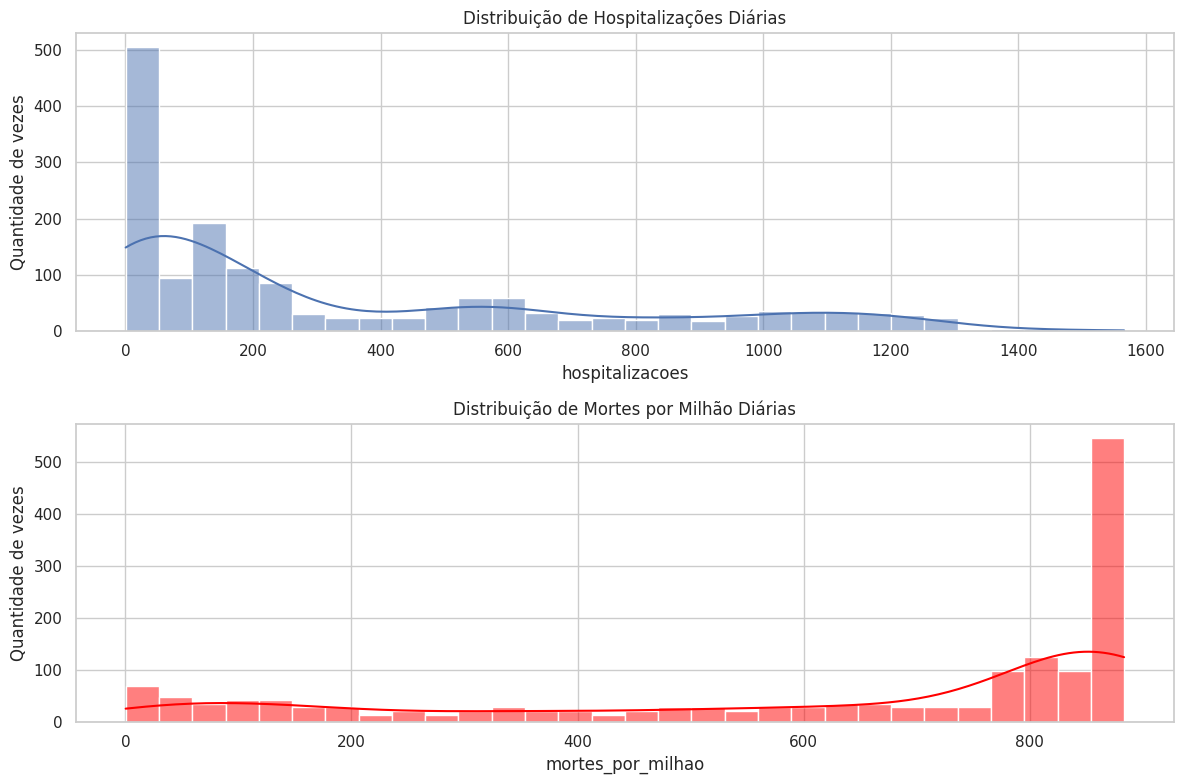

Probabilidade de um pico de hospitalização resultar em um pico de mortes: 0.00%


In [ ]:
# Converter datas para formato datetime
df_hospitalizacoes['date'] = pd.to_datetime(df_hospitalizacoes['date'])
df_mortes['date'] = pd.to_datetime(df_mortes['date'])

# Obter a lista de países disponíveis no dataframe de mortes
paises = df_mortes.columns[1:]  # Ignorando a coluna 'date'
# paises_traduzidos = [traducao_paises.get(pais, pais) for pais in paises]  # Não usado para nomes de colunas


# Filtrar df_hospitalizacoes para incluir apenas os países presentes no dataframe de mortes
df_hospitalizacoes = df_hospitalizacoes[df_hospitalizacoes['entity'].isin(paises)]

# Filtrar df_hospitalizacoes para um indicador específico (exemplo: ocupação de UTI)
df_hospitalizacoes = df_hospitalizacoes[df_hospitalizacoes['indicator'] == 'Daily ICU occupancy per million']

# Agregar dados por dia, somando df_hospitalizacoes
hospitalizacoes_diarias = df_hospitalizacoes.groupby('date')['value'].sum().reset_index().rename(columns={'value': 'hospitalizacoes'})

# Selecionar apenas os dados globais de mortes por milhão
mortes_mundo = df_mortes[['date', 'World']].rename(columns={'World': 'mortes_por_milhao'})

# Mesclar os datasets por data
dados = pd.merge(hospitalizacoes_diarias, mortes_mundo, on='date', how='inner')

# Calcular taxa de mortalidade
dados['taxa_de_mortalidade'] = dados['mortes_por_milhao'] / dados['hospitalizacoes']
dados['taxa_de_mortalidade'] = dados['taxa_de_mortalidade'].replace([np.inf, -np.inf], np.nan)
dados.dropna(inplace=True)

# Verificação para garantir que haja dados suficientes para correlação
if len(dados) >= 2:
    # Correlação entre df_hospitalizacoes e mortes
    correlacao, _ = pearsonr(dados['hospitalizacoes'], dados['mortes_por_milhao'])
    print(f"Correlação entre hospitalizações e mortes por milhão: {correlacao:.2f}")

    # Teste de independência estatística
    tabela_contingencia = pd.crosstab(dados['hospitalizacoes'], dados['mortes_por_milhao'])
    qui_quadrado, valor_p, _, _ = chi2_contingency(tabela_contingencia)
    print(f"Teste qui-quadrado de independência: valor_p = {valor_p:.5f}")
else:
    print("Dados insuficientes para calcular correlação e teste.")

# Visualizar distribuição dos dados
sns.set(style="whitegrid")
fig, eixos = plt.subplots(2, 1, figsize=(12, 8))

sns.histplot(dados['hospitalizacoes'], bins=30, kde=True, ax=eixos[0])
eixos[0].set_title("Distribuição de Hospitalizações Diárias")
eixos[0].set_ylabel("Quantidade de vezes")  # Alterar o nome do eixo vertical

sns.histplot(dados['mortes_por_milhao'], bins=30, kde=True, ax=eixos[1], color='red')
eixos[1].set_title("Distribuição de Mortes por Milhão Diárias")
eixos[1].set_ylabel("Quantidade de vezes")  # Alterar o nome do eixo vertical

plt.tight_layout()
plt.show()

# Probabilidade de um pico de df_hospitalizacoes levar a um pico de mortalidade
dados['alta_hospitalizacao'] = dados['hospitalizacoes'] > dados['hospitalizacoes'].quantile(0.75)
dados['altas_mortes'] = dados['mortes_por_milhao'] > dados['mortes_por_milhao'].quantile(0.75)
probabilidade_mortalidade_cond_hosp = dados[dados['alta_hospitalizacao']]['altas_mortes'].mean()
print(f"Probabilidade de um pico de hospitalização resultar em um pico de mortes: {probabilidade_mortalidade_cond_hosp:.2%}")